<a href="https://colab.research.google.com/github/Latamila/Airline_Passenger_Satisfaction/blob/main/Airline_Passenger_Satisfaction_ypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.2.2

In [2]:
import sklearn

In [3]:
from sklearn import preprocessing

In [4]:
import pandas as pd
import numpy as np

In [5]:
!pip install opendatasets xgboost graphviz lightgbm xgboost lightgbm --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.0 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
!pip install imblearn

In [8]:
from imblearn.over_sampling import SMOTE


#Contexto
---
Este conjunto de dados contém uma pesquisa de satisfação de passageiros de companhias aéreas. Que fatores estão altamente correlacionados com um passageiro satisfeito (ou insatisfeito)? Você pode prever a satisfação dos passageiros?

#Conteúdo
---
- Gênero: Gênero dos passageiros (feminino, masculino)

- Tipo de cliente: O tipo de cliente (cliente fiel, cliente desleal)

- Idade: A idade real dos passageiros

- Tipo de Viagem: Finalidade do voo dos passageiros (Viagem Pessoal, Viagem de Negócios)

- Classe: Classe de viagem no avião dos passageiros (Business, Eco, Eco Plus)

- Distância de voo: A distância de voo desta viagem

- Serviço wifi a bordo: Nível de satisfação do serviço wifi a bordo (0:Não aplicável;1-5)

- Horário de partida/chegada conveniente: Nível de satisfação do horário de partida/chegada conveniente

- Facilidade de reserva online: Nível de satisfação da reserva online

- Localização do portão: nível de satisfação da localização do portão

- Comida e bebida: Nível de satisfação de comida e bebida

- Embarque online: Nível de satisfação do embarque online

- Conforto do assento: Nível de satisfação do conforto do assento

- Entretenimento a bordo: Nível de satisfação do entretenimento a bordo

- Serviço de bordo: Nível de satisfação do serviço de bordo

- Espaço para pernas: Nível de satisfação do espaço para pernas

- Manuseio de bagagem: Nível de satisfação no manuseio de bagagem

- Serviço de check-in: Nível de satisfação do serviço de check-in

- Serviço de bordo: Nível de satisfação do serviço de bordo

- Limpeza: Nível de satisfação de limpeza

- Atraso na partida em minutos: Minutos de atraso na partida

- Atraso na chegada em minutos: Minutos atrasados ​​na chegada

- Satisfação: Nível de satisfação da companhia aérea (satisfação, neutra ou insatisfação)

#No setor da aviação
---
"inflight service" e "on-board service" são termos frequentemente usados para descrever os serviços oferecidos aos passageiros durante um voo. Embora se refiram a serviços similares, há uma distinção sutil entre os dois:

1. **Inflight Service**:
   - Refere-se aos serviços oferecidos durante o voo, desde o momento em que os passageiros embarcam até o momento em que desembarcam.
   - Isso inclui serviços como alimentação e bebidas servidas durante o voo, entretenimento a bordo, vendas duty-free, distribuição de cobertores, travesseiros, e outras comodidades, e atendimento de necessidades básicas dos passageiros durante o voo, como fornecimento de água e lanches.

2. **On-board Service**:
   - Refere-se a todos os serviços oferecidos a bordo da aeronave, incluindo os serviços antes, durante e depois do voo.
   - Isso pode incluir não apenas os serviços oferecidos durante o voo (inflight service), mas também serviços como check-in, embarque, assistência para acomodação de bagagem de mão e até mesmo serviços de segurança e assistência ao passageiro após o desembarque.

Em resumo, o "inflight service" é uma parte do "on-board service". O "inflight service" diz respeito especificamente aos serviços oferecidos durante o voo, enquanto o "on-board service" engloba todos os serviços oferecidos dentro da aeronave, desde antes do embarque até após o desembarque.

#ESTE É UM PROBLEMA DE:
---
#CLASSIFICAÇÃO

In [9]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [10]:
uploaded = files.upload()

Saving test.csv to test.csv


In [11]:
df_train = pd.read_csv('train.csv')

In [13]:
df_test = pd.read_csv('test.csv')

In [14]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [15]:
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [16]:
df_train.shape

(103904, 25)

In [17]:
df_test.shape

(25976, 25)

#Conjunto de dados
---
Há dois conjuntos de dados, um com dados de treino e outro com dados de teste.

`O conjunto de dados de treino tem 103.904 linhas e 25 colunas`.

`O conjunto de dados de teste tem 25.976 linhas com 25 colunas`.

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [19]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

#Parece que os conjuntos de dados tem dados nulos na coluna `Arrival Delay in Minutes`. E a variavel alvo está no conjunto de testes, o que não poderia.
---

Há 5 colunas categóricas e o restante são features numéricas. Porém como os números tratam de classificar os serviços, então a maioria são categóricas.

Na verdade, apenas atraso na partida e na chegada em minutos e distancia do voo seriam colunas numericas.

Para ter certeza sobre a qualidade do conjunto de dados, vou checar se há dados faltantes.

Logo em seguida vou fazer a transformação das colunas categóricas.

In [20]:
df_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [21]:
df_test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [22]:
#Vou tirar as duas primeiras colunas porque nao sao relevantes
df_train = df_train.iloc[:, 2:]
#no teste vou retirar a ultima coluna porque é nossa variavel alvo
teste = df_test.iloc[:, 2:-1]
df_train.head(5)
y_teste = df_test.iloc[:,-1]

In [23]:
teste.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [24]:
y_teste.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

In [25]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#vou melhorar os nomes das colunas para meu caso de uso tanto no de treino como no de teste.

In [26]:
df_train = df_train.rename(columns={'Gender':'genero',
                                    'Customer Type':'tipo_cliente',
                                    'Age':'idade',
                                    'Type of Travel':'tipo_viagem',
                                    'Class':'classe',
                                    'Flight Distance':'distancia_voo',
                                    'Inflight wifi service':'serviço_wifi_abordo',
                                    'Departure/Arrival time convenient':'pontualidade_ok',
                                    'Ease of Online booking':'facilidade_reserva_online',
                                    'Gate location':'localizacao_portao',
                                    'Food and drink':'comida_bebida',
                                    'Online boarding':'embarque_online',
                                    'Seat comfort':'conforto_assento',
                                    'Inflight entertainment':'entretenimento_a_bordo',
                                    'On-board service':'servicos_na_viagem',
                                    'Leg room service':'espaco_pernas',
                                    'Baggage handling':'manuseio_das_malas',
                                    'Checkin service':'servico_de_checkin',
                                    'Inflight service':'servico_a_bordo',
                                    'Cleanliness':'limpeza',
                                    'Departure Delay in Minutes':'partida_atrasada_minutos',
                                    'Arrival Delay in Minutes':'chegada_atrasada_minutos',
                                    'satisfaction':'satisfacao'})

In [27]:
teste = teste.rename(columns={'Gender':'genero',
                                    'Customer Type':'tipo_cliente',
                                    'Age':'idade',
                                    'Type of Travel':'tipo_viagem',
                                    'Class':'classe',
                                    'Flight Distance':'distancia_voo',
                                    'Inflight wifi service':'serviço_wifi_abordo',
                                    'Departure/Arrival time convenient':'pontualidade_ok',
                                    'Ease of Online booking':'facilidade_reserva_online',
                                    'Gate location':'localizacao_portao',
                                    'Food and drink':'comida_bebida',
                                    'Online boarding':'embarque_online',
                                    'Seat comfort':'conforto_assento',
                                    'Inflight entertainment':'entretenimento_a_bordo',
                                    'On-board service':'servicos_na_viagem',
                                    'Leg room service':'espaco_pernas',
                                    'Baggage handling':'manuseio_das_malas',
                                    'Checkin service':'servico_de_checkin',
                                    'Inflight service':'servico_a_bordo',
                                    'Cleanliness':'limpeza',
                                    'Departure Delay in Minutes':'partida_atrasada_minutos',
                                    'Arrival Delay in Minutes':'chegada_atrasada_minutos',
})

In [28]:
df_train.head(10)

,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,...,entretenimento_a_bordo,servicos_na_viagem,espaco_pernas,manuseio_das_malas,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,satisfacao
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [29]:
teste.head(10)

,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,...,conforto_assento,entretenimento_a_bordo,servicos_na_viagem,espaco_pernas,manuseio_das_malas,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,3,5,4,3,1,1,2,5,0,0.0
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,5,4,5,3,0,0.0
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,...,5,4,4,4,4,5,4,3,77,65.0
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,5,2,2,5,3,3,5,1,0.0
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,4,5,4,4,28,14.0


#Vou aplicar a função get_dummies nas colunas categóricas.

- O zero será neutral ou dissatisfied
- O um será satisfied

In [30]:
satisfeito = pd.get_dummies(df_train['satisfacao'],drop_first=True)

In [31]:
satisfeito.head()

,satisfied
0,0
1,0
2,1
3,0
4,1


#Genero
---
- Masculino = 1
- Feminino = 0

In [32]:
generos = pd.get_dummies(df_train['genero'],drop_first=True)
generos.head()

,Male
0,1
1,1
2,0
3,0
4,1


#tipo_cliente
---
- loyal customer = 0
- disloyal customar = 1

In [33]:
cliente = pd.get_dummies(df_train['tipo_cliente'],drop_first = True)
cliente.head()

,disloyal Customer
0,0
1,1
2,0
3,0
4,0


#Tipo_de_viagem
---
- personal travel = 1
- business travel = 0

In [34]:
tipo_de_viagem = pd.get_dummies(df_train['tipo_viagem'],drop_first = True)
tipo_de_viagem.head()

,Personal Travel
0,1
1,0
2,0
3,0
4,0


#Classes
---
Manteve-se Eco e Eco plus
Eco plus  = 1
Eco e business class = 0

In [35]:
classes= pd.get_dummies(df_train['classe'],drop_first = True)
classes.head()

,Eco,Eco Plus
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [36]:
df_train = pd.concat([df_train, generos,cliente, tipo_de_viagem,classes, satisfeito],axis=1)

In [37]:
df_train.head()

,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,...,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,satisfacao,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,25,18.0,neutral or dissatisfied,1,0,1,0,1,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,6.0,neutral or dissatisfied,1,1,0,0,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,0,0.0,satisfied,0,0,0,0,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,11,9.0,neutral or dissatisfied,0,0,0,0,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,0,0.0,satisfied,1,0,0,0,0,1


#Fazer o mesmo para o conjunto de teste.

In [38]:
generos = pd.get_dummies(teste['genero'],drop_first=True)
cliente = pd.get_dummies(teste['tipo_cliente'],drop_first = True)
tipo_de_viagem = pd.get_dummies(teste['tipo_viagem'],drop_first = True)
classes= pd.get_dummies(teste['classe'],drop_first = True)
teste = pd.concat([teste, generos,cliente, tipo_de_viagem,classes],axis=1)


In [39]:
teste.head()

,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,2,5,5,50,44.0,0,0,0,1,0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,3,4,5,0,0.0,0,0,0,0,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,2,0,0.0,1,1,0,1,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,3,1,4,0,6.0,1,0,0,0,0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,4,2,4,0,20.0,0,0,0,1,0


#Passando as colunas de classificação de 1 a 5 para colunas categóricas


In [40]:
df_train.columns

Index(['genero', 'tipo_cliente', 'idade', 'tipo_viagem', 'classe',
       'distancia_voo', 'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'partida_atrasada_minutos', 'chegada_atrasada_minutos', 'satisfacao',
       'Male', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus',
       'satisfied'],
      dtype='object')

In [41]:
teste.columns


Index(['genero', 'tipo_cliente', 'idade', 'tipo_viagem', 'classe',
       'distancia_voo', 'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'partida_atrasada_minutos', 'chegada_atrasada_minutos', 'Male',
       'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus'],
      dtype='object')

In [42]:
def transforma_categoricas(df, list):
    for item in list:
        df[item] = df[item].astype('category')
    return df.info()

In [43]:
colunas_categoricas = ['genero', 'tipo_cliente', 'idade', 'tipo_viagem', 'classe',
       'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'satisfacao',
       'Male', 'satisfied', 'disloyal Customer', 'Personal Travel', 'Eco',
       'Eco Plus']

transforma_categoricas(df_train, colunas_categoricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   genero                     103904 non-null  category
 1   tipo_cliente               103904 non-null  category
 2   idade                      103904 non-null  category
 3   tipo_viagem                103904 non-null  category
 4   classe                     103904 non-null  category
 5   distancia_voo              103904 non-null  int64   
 6   serviço_wifi_abordo        103904 non-null  category
 7   pontualidade_ok            103904 non-null  category
 8   facilidade_reserva_online  103904 non-null  category
 9   localizacao_portao         103904 non-null  category
 10  comida_bebida              103904 non-null  category
 11  embarque_online            103904 non-null  category
 12  conforto_assento           103904 non-null  category
 13  entretenimento

In [44]:
#sem satisfacao nem satisfied

colunas_categoricas = ['genero', 'tipo_cliente', 'idade', 'tipo_viagem', 'classe',
       'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'Male', 'disloyal Customer', 'Personal Travel', 'Eco',
       'Eco Plus']

transforma_categoricas(teste, colunas_categoricas)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   genero                     25976 non-null  category
 1   tipo_cliente               25976 non-null  category
 2   idade                      25976 non-null  category
 3   tipo_viagem                25976 non-null  category
 4   classe                     25976 non-null  category
 5   distancia_voo              25976 non-null  int64   
 6   serviço_wifi_abordo        25976 non-null  category
 7   pontualidade_ok            25976 non-null  category
 8   facilidade_reserva_online  25976 non-null  category
 9   localizacao_portao         25976 non-null  category
 10  comida_bebida              25976 non-null  category
 11  embarque_online            25976 non-null  category
 12  conforto_assento           25976 non-null  category
 13  entretenimento_a_bordo     2597

#Apenas a coluna `Arrival Delay in Minutes`possuem dados faltantes: 310 no `df_train` e 83 no `df_test`

In [45]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
distancia_voo,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
partida_atrasada_minutos,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
chegada_atrasada_minutos,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


- O nivel de satisfação não está como NPS que é metrificado de 0 a 10 e sim, de 0 a 5.

- As colunas `Departure Delay in Minutes` e `Arrival Delay in Minutes` estão com os dados muito discrepantes.

`50% dos dados estão com estas colunas preenchidas com 0 e a porção entre 50 a 75% dos dados tem atrasos até 12 e 13 minutos, respectivamente. Ao se visualizar o valor máximo, é muito acima do restante do dataset, mas isso pode se passar na aviação sim.

O que acho estranho é constar zero na coluna de atraso.

Então quer dizer que o voo saiu no horário?

`Vou assumir que sim`.

Como há alguns valores faltantes na coluna de atraso na chegada, vou considerar que o sistema (ou pessoa) que coletou esta pesquisa, preenchou corretamente quando o voo chegava atrasado e quando chegava no horário OU DEIXAVA EM BRANCO OU PREENCHIA COM ZERO.


`Então, tomei a decisão de considerar os valores faltantes como chegadas no horário`. E por isso, foi preencher os valores faltantes com '0'.

In [46]:
df_train['chegada_atrasada_minutos'].fillna(0, inplace=True)
teste['chegada_atrasada_minutos'].fillna(0, inplace=True)

Vou fazer um double-check de como ficou os dados faltantes.

In [47]:
df_train.isna().sum()

genero                       0
tipo_cliente                 0
idade                        0
tipo_viagem                  0
classe                       0
distancia_voo                0
serviço_wifi_abordo          0
pontualidade_ok              0
facilidade_reserva_online    0
localizacao_portao           0
comida_bebida                0
embarque_online              0
conforto_assento             0
entretenimento_a_bordo       0
servicos_na_viagem           0
espaco_pernas                0
manuseio_das_malas           0
servico_de_checkin           0
servico_a_bordo              0
limpeza                      0
partida_atrasada_minutos     0
chegada_atrasada_minutos     0
satisfacao                   0
Male                         0
disloyal Customer            0
Personal Travel              0
Eco                          0
Eco Plus                     0
satisfied                    0
dtype: int64

In [48]:
teste.isnull().sum() #é a mesma coisa que .isna()

genero                       0
tipo_cliente                 0
idade                        0
tipo_viagem                  0
classe                       0
distancia_voo                0
serviço_wifi_abordo          0
pontualidade_ok              0
facilidade_reserva_online    0
localizacao_portao           0
comida_bebida                0
embarque_online              0
conforto_assento             0
entretenimento_a_bordo       0
servicos_na_viagem           0
espaco_pernas                0
manuseio_das_malas           0
servico_de_checkin           0
servico_a_bordo              0
limpeza                      0
partida_atrasada_minutos     0
chegada_atrasada_minutos     0
Male                         0
disloyal Customer            0
Personal Travel              0
Eco                          0
Eco Plus                     0
dtype: int64

#Data Viz
---
Inicializar uma visualização das features e sua possivel correlação com a feature alvo que é `satisfaction`.

Para isso, testei visualizar cada dataset separado mas percebi que estão mostrando insights divergentes, talvez pela distribuição dos dados. Então, vou unir os dois e eliminar as duas primeiras colunas que não preciso.

#Examinar a coluna alvo.

In [49]:
df_train['satisfied'].unique()

[0, 1]
Categories (2, uint64): [0, 1]

Neste dataset, dá para ter alguns insights. A partir das colunas categóricas:

- Os clientes que possuem o programa de fidelidade tendem a responder mais pesquisas de satisfação que os que não tem o programa.
- Os clientes com viagem a Negocios(business travel) estão mais satisfeitos.
- Os clientes que viajaram na Business Class estão mais satisfeitos e os que viajaram na Economica estão mais insatisfeitos.


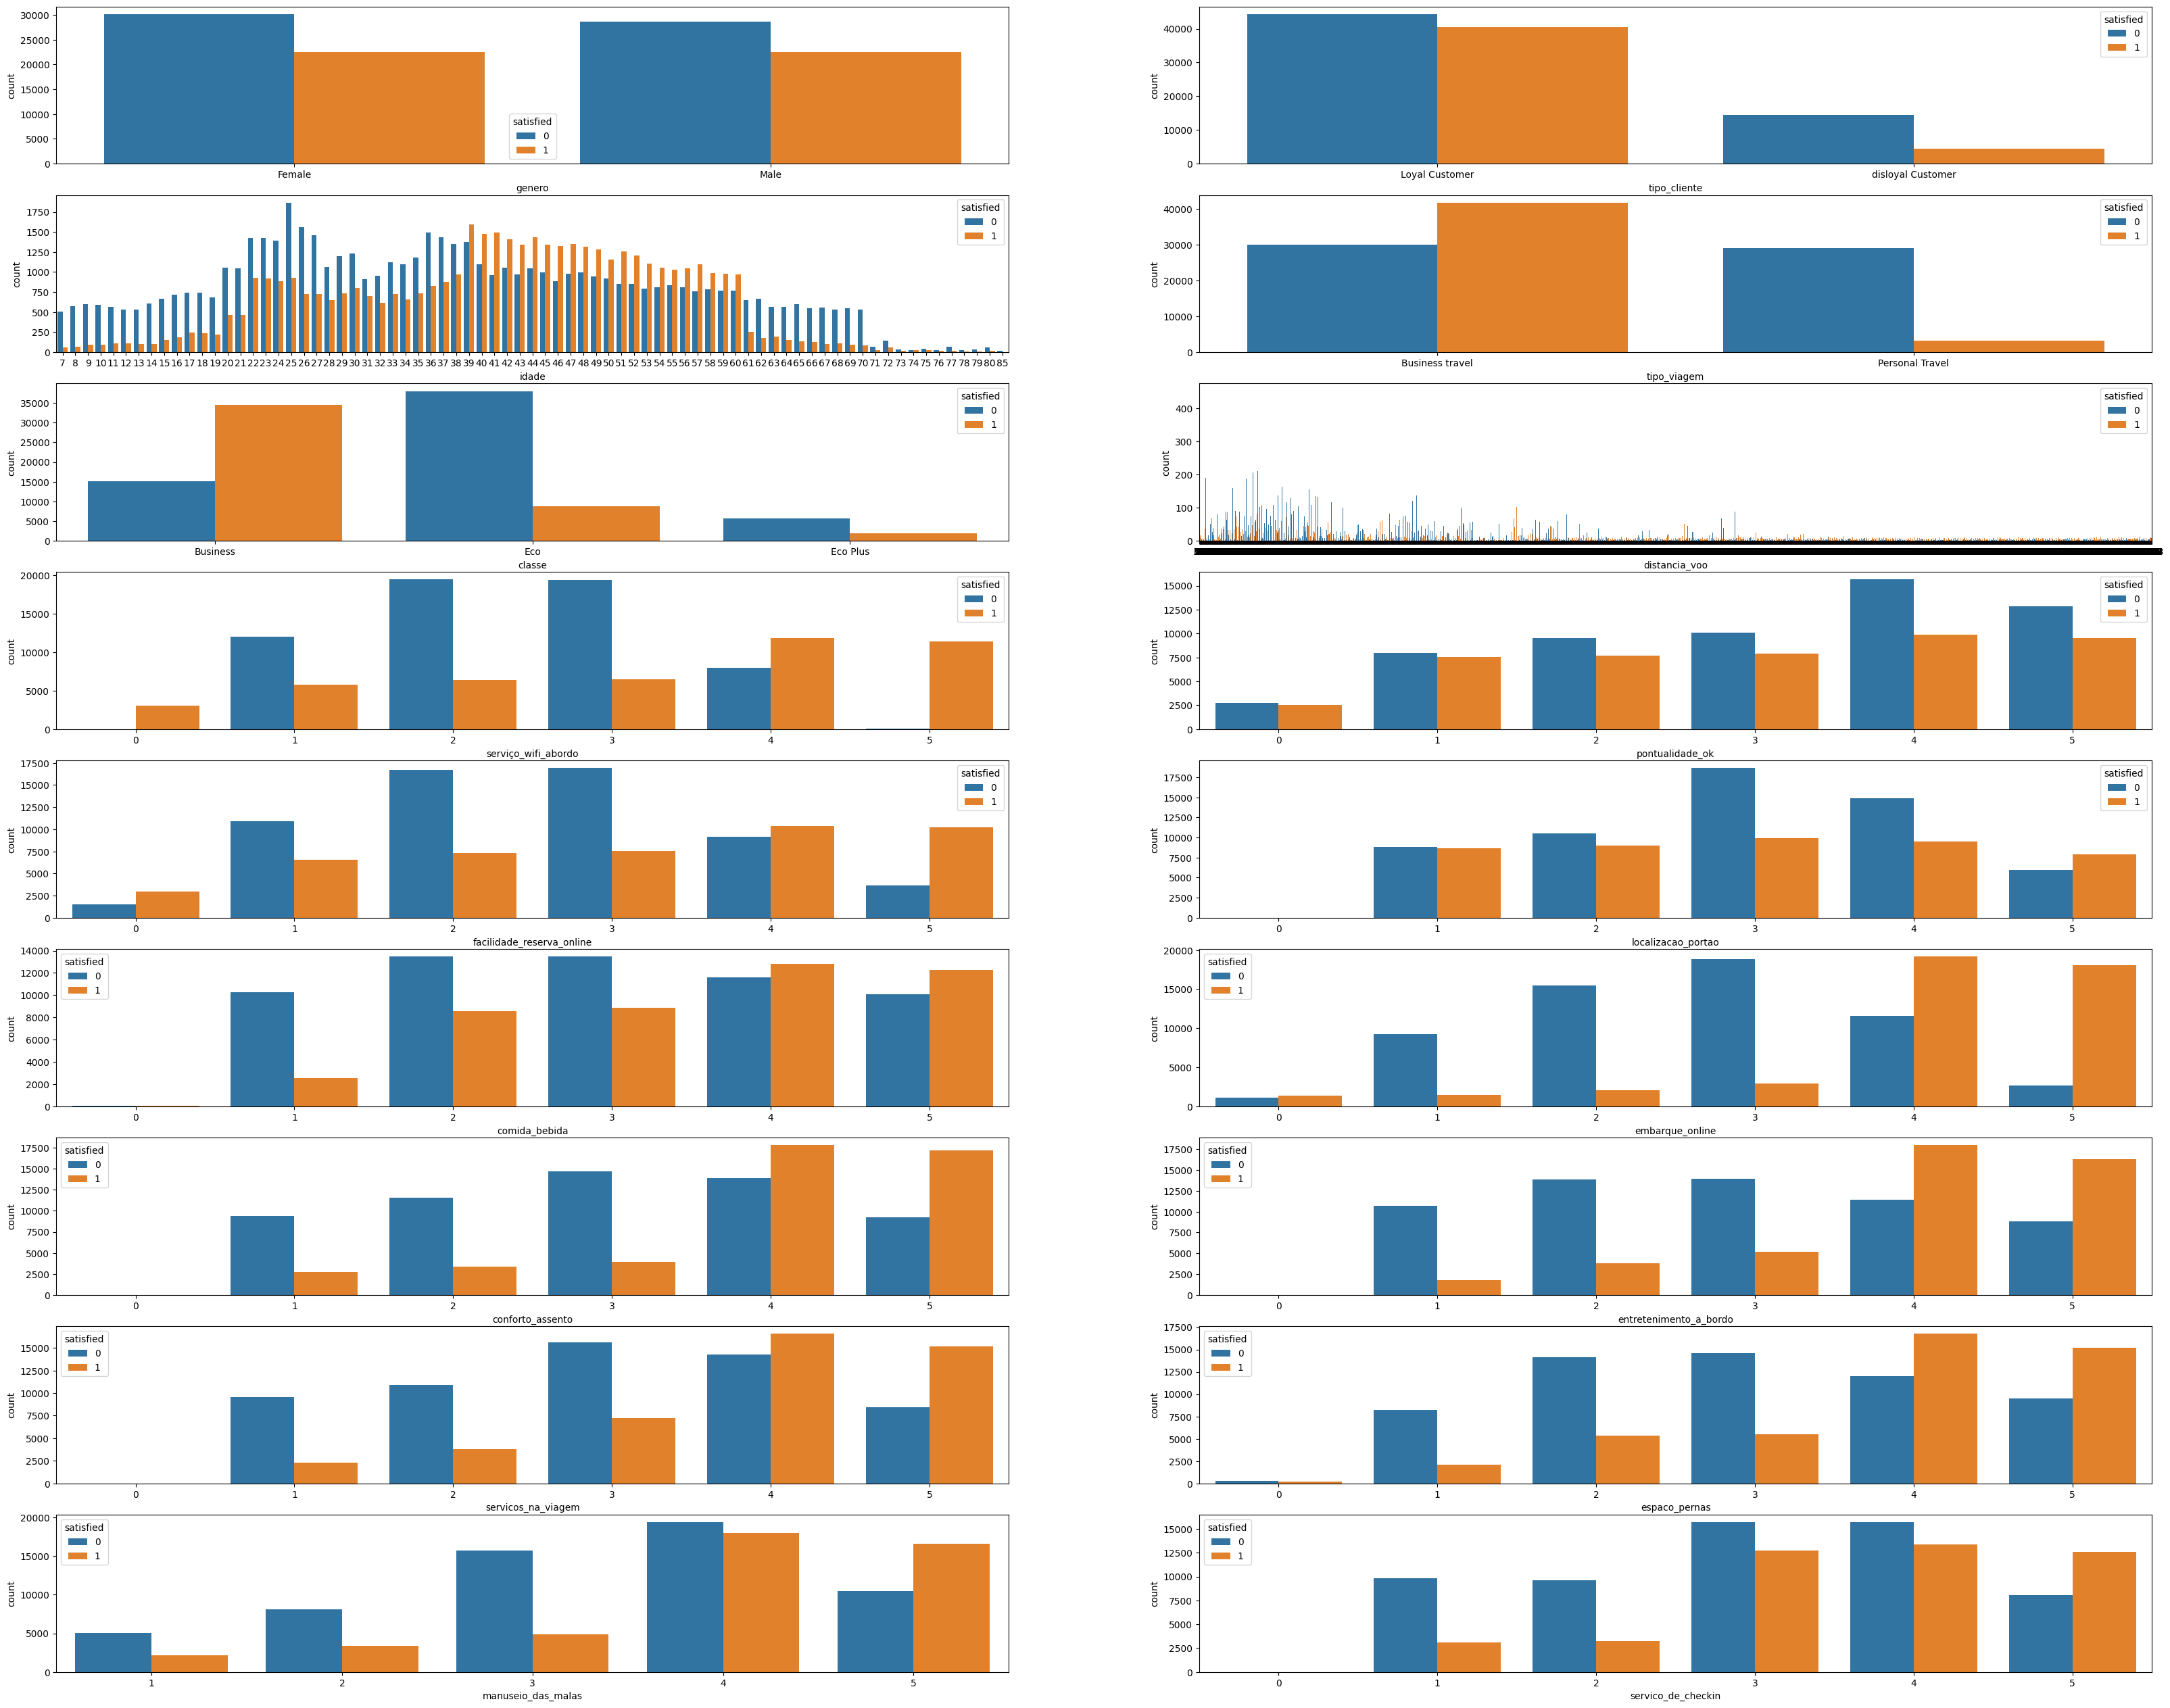

In [50]:
fig, ax = plt.subplots(9,2,figsize=(40,32))

scols = df_train.select_dtypes(exclude=object).columns

for ax, col in zip(ax.flatten(), scols):
    sns.countplot(df_train, x=col, ax=ax, hue='satisfied')

-  Sera que a idade influencia na responsividade positiva ou negativa de uma pesquisa?

- Serviços de wifi a bordo classificados como 5, resultaram em mais clientes satisfeitos.

- Facilidade para reservar online influencia na satisfação final?

-Mesmo dando pontuação 5 em algum item, há pesquisas classificadas como insatisfeitos, mostrando que só aquele setor não leva a uma jornada de satisfação.





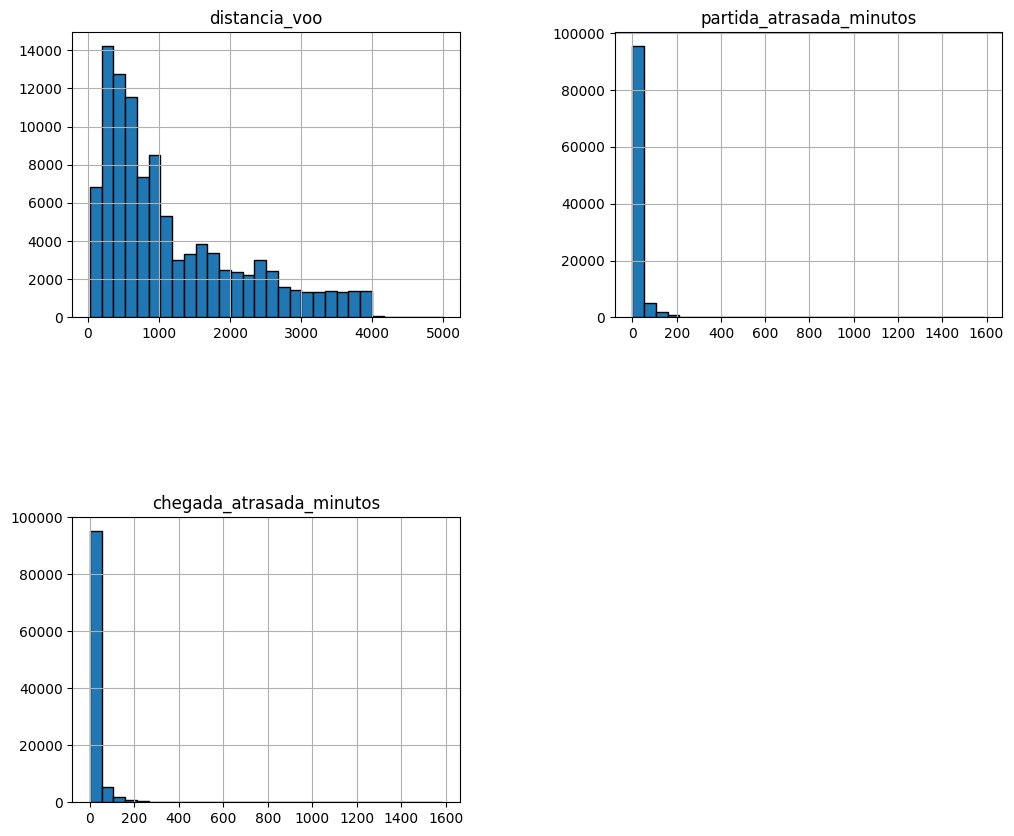

In [51]:
df_train.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

- A coluna `Idade` está com distribuição normal aparentemente, com exceção dos passageiros com 25 anos.
- A coluna `Flight Distance`tem uma cauda longa à esquerda mostrando que a pesquisa foi respondida por passageiros do narrow body ou medium body(voos de pequena ou media distancia).

In [52]:
def satisfacao(y, x= 'satisfied', data= df_train,) :
    sns.boxplot(x=x, y=y, data=data)

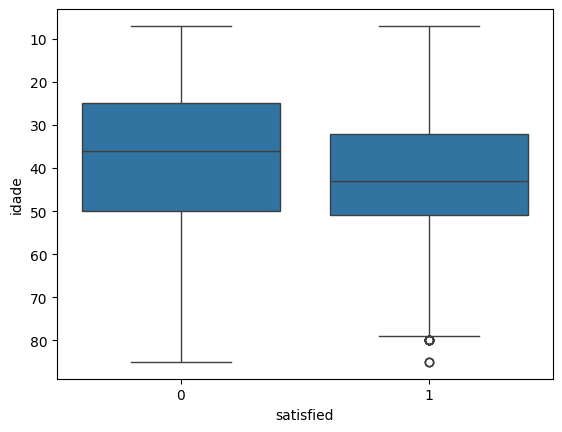

In [53]:
satisfacao('idade')

A interpretação de um gráfico de boxplot gerado pelo Pandas em Python envolve entender os diferentes elementos presentes no gráfico e como eles representam os dados estatísticos do conjunto de dados. Aqui estão os principais pontos para interpretar um gráfico de boxplot:

1. **Caixa (Box)**:
   - A caixa no centro do gráfico representa o intervalo interquartil (IQR), que é a diferença entre o primeiro quartil (Q1) e o terceiro quartil (Q3) dos dados.
   - A linha no meio da caixa é a mediana (Q2), que divide o conjunto de dados ao meio.

2. **Whiskers** (ou "bigodes"):
   - As linhas que se estendem para fora da caixa (whiskers) representam os limites dos dados. Eles podem ser calculados de diferentes maneiras:
     - Às vezes, eles se estendem até 1,5 vezes o IQR a partir dos quartis superior e inferior.
     - Outras vezes, eles podem se estender até o mínimo e o máximo dos dados, ou até um percentil específico.
   - Pontos fora dos bigodes são considerados outliers.

3. **Outliers**:
   - São pontos que estão fora do intervalo definido pelos bigodes e são representados como pontos individuais no gráfico.

4. **Pontos individuais**:
   - São dados que estão fora do intervalo dos bigodes, mas não são considerados outliers de acordo com a definição usada para calcular os whiskers.




Interpretar um gráfico de boxplot ajuda a entender a distribuição dos dados e identificar qualquer variabilidade ou assimetria nos dados.


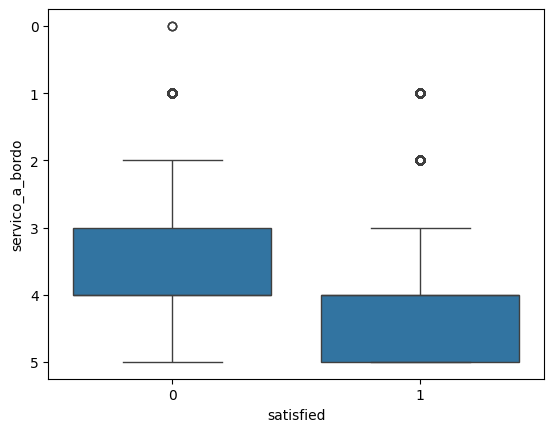

In [54]:
satisfacao('servico_a_bordo')

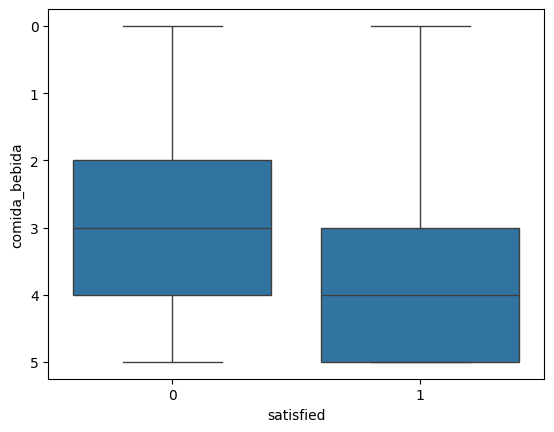

In [55]:
satisfacao('comida_bebida')

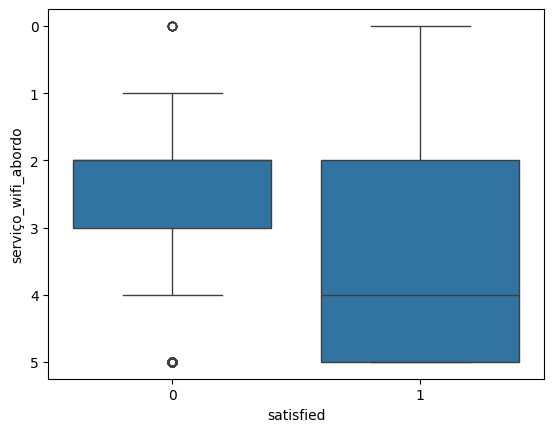

In [56]:
satisfacao('serviço_wifi_abordo')

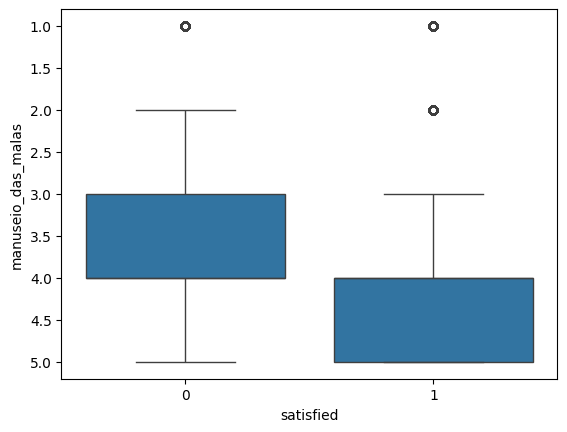

In [57]:
satisfacao('manuseio_das_malas')

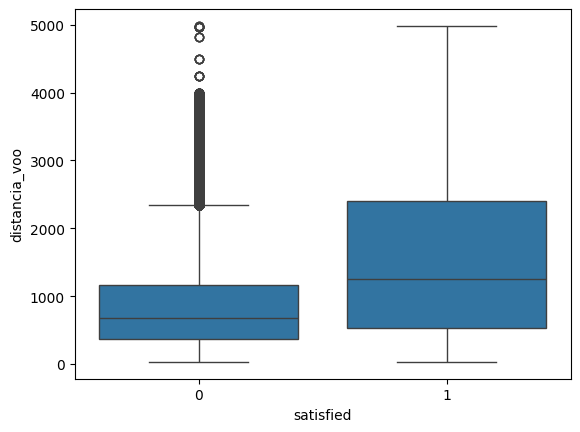

In [58]:
satisfacao('distancia_voo')

A concentração dos passageiros insatisfeitos está nos voos de curta distancia e os satisfeitos estão nos voos de curta e média distancia.

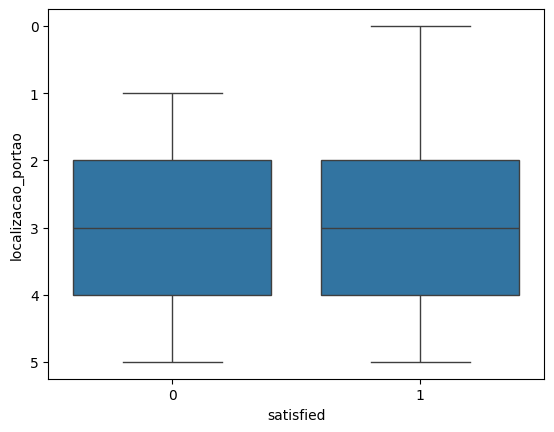

In [59]:
satisfacao('localizacao_portao')

#A localização do portão, aparentemente, não influencia para uma nota final de satisfação.
---
Pode-se, inclusive, notar que deram 0 para localização do portao mas ficaram classificados como satisfeitos, no final.

<Axes: xlabel='satisfied', ylabel='manuseio_das_malas'>

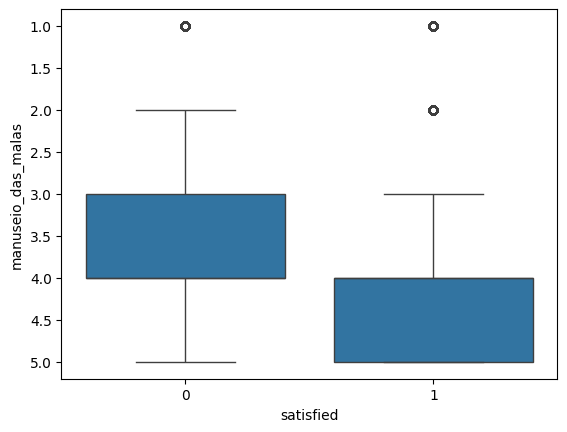

In [60]:
sns.boxplot(x='satisfied', y= 'manuseio_das_malas', data=df_train)

#Parece que para esta feature influenciar na nota positiva, o manuseio das malas tem que receber 4 ou 5, pelo menos.

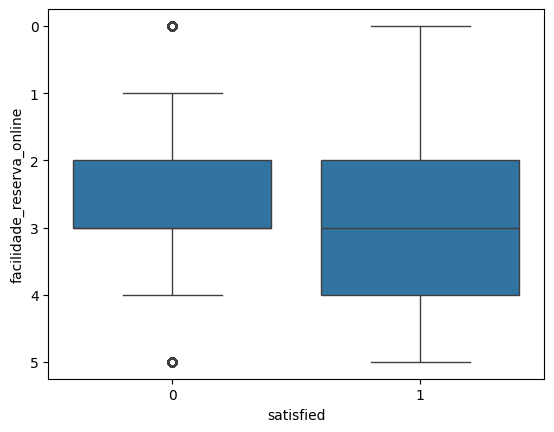

In [61]:
satisfacao('facilidade_reserva_online')

#Na média, os passageiros satisfeitos pontuaram esta feature entre 2 e 4.

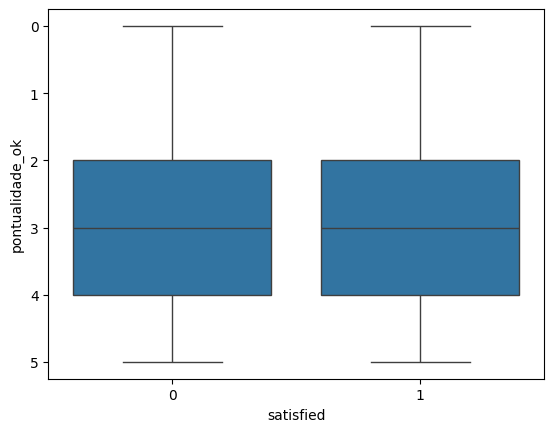

In [62]:
satisfacao('pontualidade_ok')

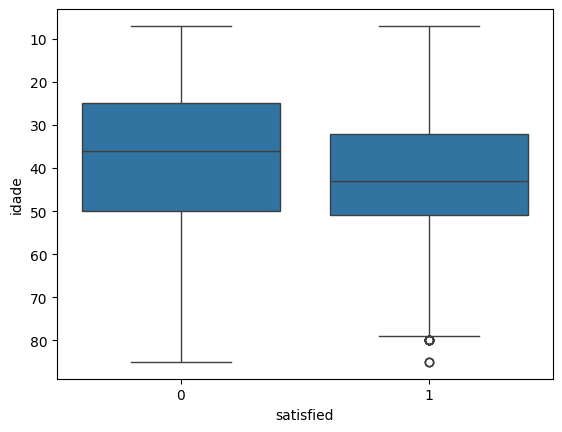

In [63]:
satisfacao('idade')

<Axes: xlabel='satisfied', ylabel='espaco_pernas'>

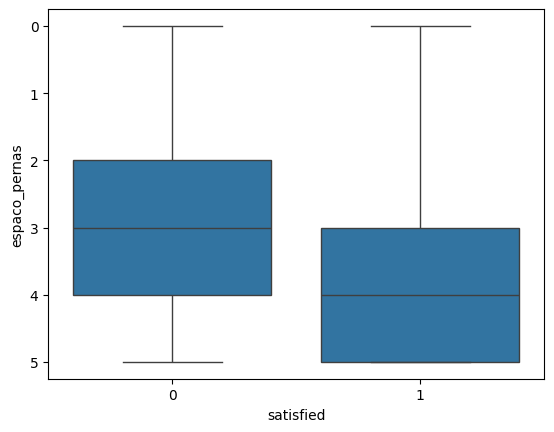

In [64]:
sns.boxplot(x='satisfied', y= 'espaco_pernas', data=df_train)

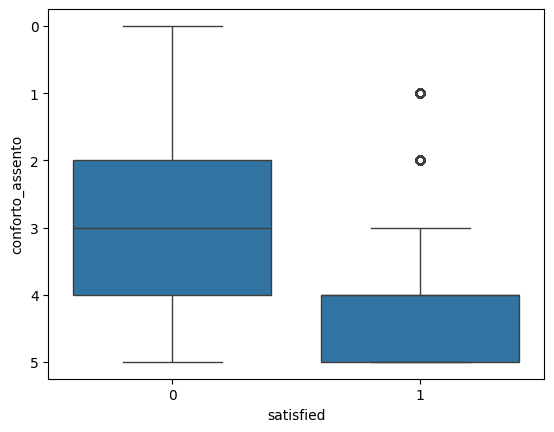

In [65]:
satisfacao('conforto_assento')

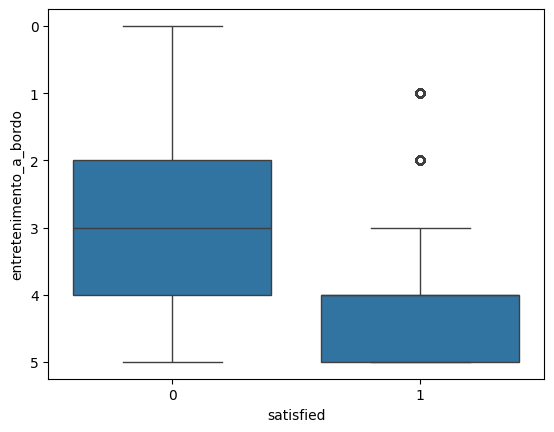

In [66]:
satisfacao('entretenimento_a_bordo')

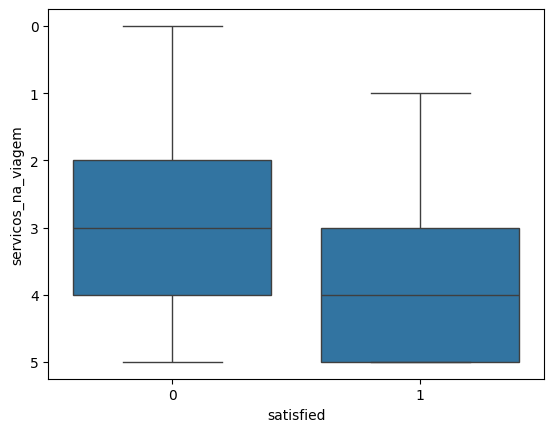

In [67]:
satisfacao('servicos_na_viagem')

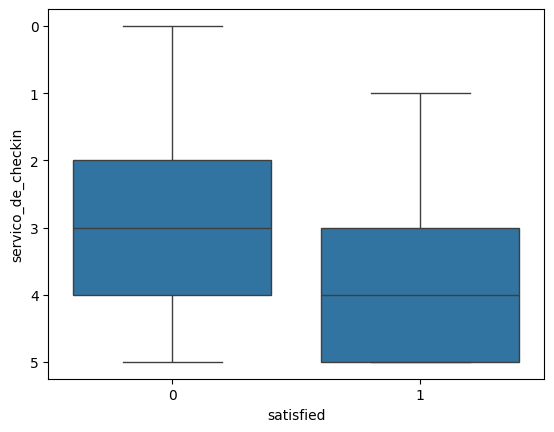

In [68]:
satisfacao('servico_de_checkin')

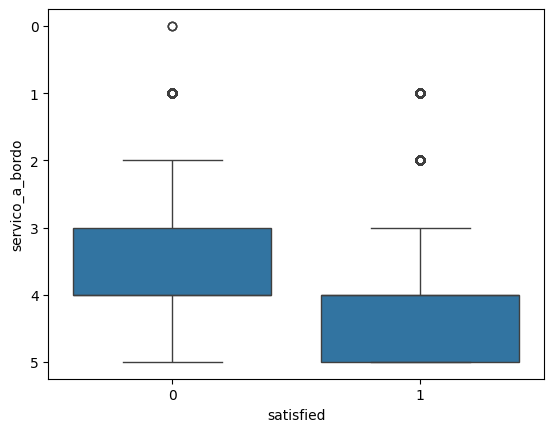

In [69]:
satisfacao('servico_a_bordo')

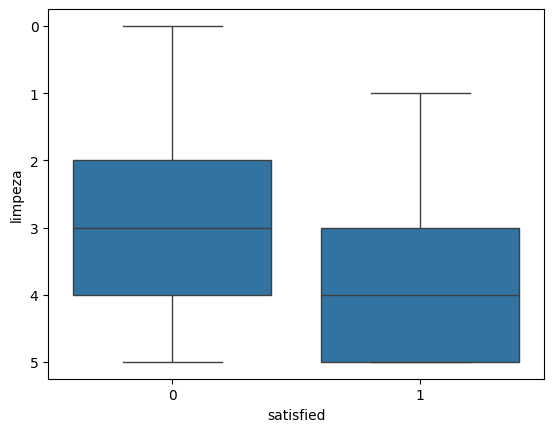

In [70]:
satisfacao('limpeza')

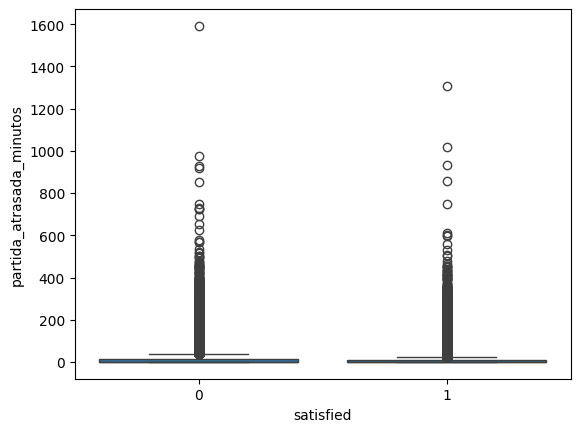

In [71]:
satisfacao('partida_atrasada_minutos')

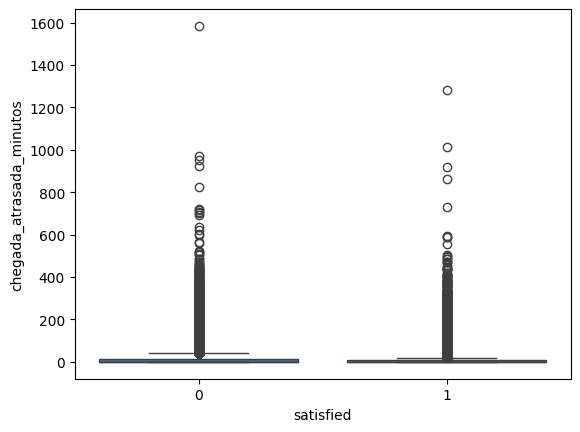

In [72]:
satisfacao('chegada_atrasada_minutos')

In [73]:
df_train.columns

Index(['genero', 'tipo_cliente', 'idade', 'tipo_viagem', 'classe',
       'distancia_voo', 'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'partida_atrasada_minutos', 'chegada_atrasada_minutos', 'satisfacao',
       'Male', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus',
       'satisfied'],
      dtype='object')

Para isso, optei por usar a função boxcox do modulo stats da biblioteca scipy. Como os dados tem uma variância grande, acredito que irá ajudar.

A `função boxcox do módulo scipy.stats` é utilizada para a transformação de Box-Cox. Essa transformação é comumente usada para estabilizar a variância e tornar os dados mais normalmente distribuídos. Ela recebe um objeto semelhante a um array como entrada e retorna dois valores: o array transformado e o parâmetro lambda usado na transformação.

In [74]:
from scipy.stats import boxcox

In [75]:
df_train['distancia_voo'] = boxcox(df_train['distancia_voo'])[0]
df_train['chegada_atrasada_minutos'] = np.sqrt(np.log1p(df_train['chegada_atrasada_minutos']))
df_train['partida_atrasada_minutos'] = np.sqrt(np.log1p(df_train['partida_atrasada_minutos']))

In [76]:
teste['distancia_voo'] = boxcox(teste['distancia_voo'])[0]
teste['chegada_atrasada_minutos'] = np.sqrt(np.log1p(teste['chegada_atrasada_minutos']))
teste['partida_atrasada_minutos'] = np.sqrt(np.log1p(teste['partida_atrasada_minutos']))

In [77]:
df_train

,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,...,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,satisfacao,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,8.700123,3,4,3,1,...,5,1.805020,1.715937,neutral or dissatisfied,1,0,1,0,1,0
1,Male,disloyal Customer,25,Business travel,Business,7.442524,3,2,3,3,...,1,0.832555,1.394959,neutral or dissatisfied,1,1,0,0,0,0
2,Female,Loyal Customer,26,Business travel,Business,10.555101,2,2,2,2,...,5,0.000000,0.000000,satisfied,0,0,0,0,0,1
3,Female,Loyal Customer,25,Business travel,Business,9.093157,2,5,5,5,...,2,1.576359,1.517427,neutral or dissatisfied,0,0,0,0,0,0
4,Male,Loyal Customer,61,Business travel,Business,7.274391,3,3,3,3,...,3,0.000000,0.000000,satisfied,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,7.081666,2,1,2,3,...,2,1.177410,0.000000,neutral or dissatisfied,0,1,0,1,0,0
103900,Male,Loyal Customer,49,Business travel,Business,12.159808,4,4,4,4,...,4,0.000000,0.000000,satisfied,1,0,0,0,0,1
103901,Male,disloyal Customer,30,Business travel,Business,11.786827,1,1,1,3,...,4,1.442027,1.645615,neutral or dissatisfied,1,1,0,0,0,0
103902,Female,disloyal Customer,22,Business travel,Eco,10.272720,1,1,1,5,...,1,0.000000,0.000000,neutral or dissatisfied,0,1,0,1,0,0


In [78]:
scols = [
       'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'Male','disloyal Customer', 'Personal Travel', 'Eco','satisfied'
       'Eco Plus']

In [79]:
X = df_train.drop(['tipo_cliente','classe','tipo_viagem','satisfacao','genero','satisfied'], axis=1)

In [80]:
X.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,13,8.700123,3,4,3,1,5,3,5,5,...,4,5,5,1.805020,1.715937,1,0,1,0,1
1,25,7.442524,3,2,3,3,1,3,1,1,...,1,4,1,0.832555,1.394959,1,1,0,0,0
2,26,10.555101,2,2,2,2,5,5,5,5,...,4,4,5,0.000000,0.000000,0,0,0,0,0
3,25,9.093157,2,5,5,5,2,2,2,2,...,1,4,2,1.576359,1.517427,0,0,0,0,0
4,61,7.274391,3,3,3,3,4,5,5,3,...,3,3,3,0.000000,0.000000,1,0,0,0,0


In [81]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   idade                      103904 non-null  category
 1   distancia_voo              103904 non-null  float64 
 2   serviço_wifi_abordo        103904 non-null  category
 3   pontualidade_ok            103904 non-null  category
 4   facilidade_reserva_online  103904 non-null  category
 5   localizacao_portao         103904 non-null  category
 6   comida_bebida              103904 non-null  category
 7   embarque_online            103904 non-null  category
 8   conforto_assento           103904 non-null  category
 9   entretenimento_a_bordo     103904 non-null  category
 10  servicos_na_viagem         103904 non-null  category
 11  espaco_pernas              103904 non-null  category
 12  manuseio_das_malas         103904 non-null  category
 13  servico_de_che

In [83]:
#converter colunas categóricas em numéricas, se necessário
label_encoders = {}
for column in X.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [84]:
label_encoders

{'idade': LabelEncoder(),
 'serviço_wifi_abordo': LabelEncoder(),
 'pontualidade_ok': LabelEncoder(),
 'facilidade_reserva_online': LabelEncoder(),
 'localizacao_portao': LabelEncoder(),
 'comida_bebida': LabelEncoder(),
 'embarque_online': LabelEncoder(),
 'conforto_assento': LabelEncoder(),
 'entretenimento_a_bordo': LabelEncoder(),
 'servicos_na_viagem': LabelEncoder(),
 'espaco_pernas': LabelEncoder(),
 'manuseio_das_malas': LabelEncoder(),
 'servico_de_checkin': LabelEncoder(),
 'servico_a_bordo': LabelEncoder(),
 'limpeza': LabelEncoder(),
 'Male': LabelEncoder(),
 'disloyal Customer': LabelEncoder(),
 'Personal Travel': LabelEncoder(),
 'Eco': LabelEncoder(),
 'Eco Plus': LabelEncoder()}

In [85]:
df = pd.DataFrame(StandardScaler().fit_transform(X.iloc[:,:]), columns=X.columns[:])

In [86]:
df.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,-1.745454,-0.657900,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.549799,1.156436,1.305870,1.280246,1.155509,1.015031,-0.472767,1.490614,-0.904327,3.586776
1,-0.951436,-1.325108,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-1.821012,0.305848,-1.742292,0.138880,0.781264,1.015031,2.115208,-0.670865,-0.904327,-0.278802
2,-0.885268,0.326242,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.549799,0.305848,1.305870,-0.838275,-0.845195,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802
3,-0.951436,-0.449379,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.821012,0.305848,-0.980251,1.011870,0.924056,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802
4,1.430619,-1.414309,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.240472,-0.544740,-0.218211,-0.838275,-0.845195,1.015031,-0.472767,-0.670865,-0.904327,-0.278802


In [87]:
df['satisfeito'] = df_train['satisfied']

In [88]:
df.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfeito
0,-1.745454,-0.657900,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.156436,1.305870,1.280246,1.155509,1.015031,-0.472767,1.490614,-0.904327,3.586776,0
1,-0.951436,-1.325108,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0.305848,-1.742292,0.138880,0.781264,1.015031,2.115208,-0.670865,-0.904327,-0.278802,0
2,-0.885268,0.326242,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.305848,1.305870,-0.838275,-0.845195,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802,1
3,-0.951436,-0.449379,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,0.305848,-0.980251,1.011870,0.924056,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802,0
4,1.430619,-1.414309,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.544740,-0.218211,-0.838275,-0.845195,1.015031,-0.472767,-0.670865,-0.904327,-0.278802,1


In [89]:
#converter colunas categóricas em numéricas, se necessário
test = teste.drop(['tipo_cliente','classe','tipo_viagem','genero'], axis=1)

label_encoders = {}
for column in test.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

In [90]:
test = pd.DataFrame(StandardScaler().fit_transform(test.iloc[:,:]), columns=test.columns[:])
test.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,-1.035348,1.144063,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.247517,0.297077,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.035348,-1.396893,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.247517,-2.243878,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.540315,-1.396893,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size=0.9
)

X_train.shape, y_test.shape

((93513, 23), (10391,))

#Regressão Logística
---


In [93]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [94]:
predictions = logmodel.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.91      0.90      5942\n           1       0.87      0.84      0.86      4449\n\n    accuracy                           0.88     10391\n   macro avg       0.88      0.87      0.88     10391\nweighted avg       0.88      0.88      0.88     10391\n'

Segundo o blog Ichi.pro, a métrica F1-score é uma das métricas mais importantes no Machine Learning. Entendendo que 'raios' é isso!

Na Estatística ouvimos o conceito de Acurácia, Precisão, Recall e F1-score. Depois já partimos para códigos e bibliotecas prontas, mas saber o conceito por tras é primordial pra facilitar sua tomada de decisão sobre as métricas de avaliação que podemos utilizar.

Já ouvimos falar também de Falso Positivo, Verdadeiro Positivo, Falso Negativo, Verdadeiro Negativo.

Pois é! É com estes valores da matriz de confusão que se calcula as métricas acima.

Vamos ver aqui: Acurácia: É a divisão entre as somas dos Verdadeiros positivos e negativos E todos os valores da matriz de confusao (os Trues e os False).

Já a Precisão é a divisão entre o Verdadeiro Positivo e os Positivos Verdadeiro e Falso.

O Recall também é uma divisão do Verdadeiro Positivo porém agora, se divide com a soma do Verdadeiro Positivo e Falso Negativo.

Por fim, o F1-score! Segundo o blog Ichi.pro, a métrica F1-score é uma das métricas mais importantes no Machine Learning. Ele resume elegantemente o desempenho preditivo de um modelo, combinando duas métricas concorrentes- precisão e recall, que já aprendemos a calcular. Em comparação, o F1 é a média harmônica de precisão e recall. A pontuação F1 varia entre 0 e 1. Quanto mais próximo de 1, melhor é o modelo.

Qual métrica escolher?
Bom, se no seu estudo de caso, os erros Falso Positivos são mais indesejáveis, escolha uma versão do modelo com base na PRECISÃO, que tenha maior pontuação.

Se os erros causados pelos Falso Negativos são mais indesejáveis, então selecionamos a versão do modelo que baseado noRECALL, obteve a maior pontuação.

Por fim, *se avaliarmos que ambos os tipos de erros são indesejáveis, seleciona-se a versão do modelo baseado na pontuação F1 que obteve a maior pontuação. *

Parece complicada a fórmula do F1 mas se trata de uma Média. Média Harmônica e ainda há a média aritmética(nossa velha média) e a média geométrica(que é a raiz quadrada do Produto entre x e y).

Insights??? Temos!! Quanto mais desiguais forem os valores de precisão e recall, menor será o score do F1 ou da média harmônica.

Por quê? Porque a média harmônica consegue 'penalizar mais valores extremamente desiguais e valores extremamente baixos', mais do que a média aritmética ou a geométrica. Vale dizer também que se Precisão OU Recall for 0, F1 será 0.

Aqui já dá pra entender que na fase de Avaliação do seu Modelo de Machine Learning, a escolha entre Precisão, Recall ou F1 para avaliar modelos depende dos impactos relativos de Falso Positivos e Falso Negativos em seu caso de uso.



In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, predictions)

array([[5401,  541],
       [ 713, 3736]])

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
f'O modelo apresentou {round(accuracy_score(y_test, predictions)*100)}% de acurácia'

'O modelo apresentou 88% de acurácia'

Calculamos a acurácia para checar o quão acurados, os resultados estão.

In [101]:
test.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,-1.035348,1.144063,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.247517,0.297077,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.035348,-1.396893,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.247517,-2.243878,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.540315,-1.396893,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#lbibliotecas para avaliação do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Ridge Classifier
---

In [103]:
from sklearn.linear_model import RidgeClassifier
rc =RidgeClassifier()
model0 = rc.fit(X_train, y_train)
print("train accuracy:",model0.score(X_train, y_train),"\n","test accuracy:",
      model0.score(X_test,y_test))
rcpred = rc.predict(X_test)
print("\n")
print("classification report for Ridge Classifier")
print(classification_report(rcpred,y_test))
print("\n")
print("confusion matrix for Ridge Classifier")
disprc =confusion_matrix(y_test, rcpred)
disprc

train accuracy: 0.8719536321153208 
 test accuracy: 0.8747954961023963


classification report for Ridge Classifier
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6093
           1       0.84      0.87      0.85      4298

    accuracy                           0.87     10391
   macro avg       0.87      0.87      0.87     10391
weighted avg       0.88      0.87      0.88     10391



confusion matrix for Ridge Classifier


array([[5367,  575],
       [ 726, 3723]])

#Regressao Logistica
---

In [104]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(X_train, y_train)
print("train accuracy:",model1.score(
    X_train, y_train),"\n","test accuracy:",
      model1.score(X_test,y_test))
lrpred = lr.predict(X_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = confusion_matrix( y_test, lrpred)
displr

train accuracy: 0.8753542288237999 
 test accuracy: 0.8793186411317486


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6114
           1       0.84      0.87      0.86      4277

    accuracy                           0.88     10391
   macro avg       0.87      0.88      0.88     10391
weighted avg       0.88      0.88      0.88     10391



confusion matrix for logistic regression


array([[5401,  541],
       [ 713, 3736]])

#Analise Discriminante linear
---


In [105]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(X_train, y_train)
print("train accuracy:",model2.score(X_train, y_train),"\n","test accuracy:",model2.score(X_test,y_test))

ldapred = lda.predict(X_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displda = confusion_matrix( y_test, ldapred)
displda

train accuracy: 0.8719750195160031 
 test accuracy: 0.8746030218458282


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6089
           1       0.84      0.87      0.85      4302

    accuracy                           0.87     10391
   macro avg       0.87      0.87      0.87     10391
weighted avg       0.88      0.87      0.87     10391



confusion matrix for linear discriminant analysis


array([[5364,  578],
       [ 725, 3724]])

#classificação de Árvore de Decisão
---

In [106]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(X_train, y_train)
print("train accuracy:",
      model3.score(X_train, y_train),
      "\n","test accuracy:",model3.score(X_test,y_test))

dtpred = dt.predict(X_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
dispdt = confusion_matrix( y_test, dtpred)
dispdt

train accuracy: 1.0 
 test accuracy: 0.9464921566740448


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5906
           1       0.94      0.93      0.94      4485

    accuracy                           0.95     10391
   macro avg       0.95      0.94      0.95     10391
weighted avg       0.95      0.95      0.95     10391



confusion matrix for decision tree classifier


array([[5646,  296],
       [ 260, 4189]])

#Classificação por Gradient Boost
---

In [107]:
gbm=GradientBoostingClassifier()
model5=gbm.fit(X_train, y_train)
print("train accuracy:",model5.score(X_train, y_train),
      "\n","test accuracy:",model5.score(X_test,y_test))

gbmpred = gbm.predict(X_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
dispgbm = confusion_matrix( y_test, gbmpred)
dispgbm

train accuracy: 0.94099216151765 
 test accuracy: 0.9461072081609084


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6054
           1       0.92      0.95      0.94      4337

    accuracy                           0.95     10391
   macro avg       0.94      0.95      0.94     10391
weighted avg       0.95      0.95      0.95     10391



confusion matrix for gradient boosting classifier


array([[5718,  224],
       [ 336, 4113]])

#Classificação por AdaBoost
---


In [108]:
ada=AdaBoostClassifier()
model6=ada.fit(X_train, y_train)
print("train accuracy:",model6.score(X_train, y_train),"\n","test accuracy:",model6.score(X_test,y_test))

adapred = ada.predict(X_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
dispada = confusion_matrix( y_test, adapred)
dispada

train accuracy: 0.9271652069765701 
 test accuracy: 0.9327302473294197


classification report for adaboost classifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6011
           1       0.91      0.93      0.92      4380

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391



confusion matrix for adaboost classifier


array([[5627,  315],
       [ 384, 4065]])

#Classificação por Extreme Gradient Boost
---

In [109]:
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(X_train.values, y_train)
print("train accuracy:",model7.score(X_train, y_train),
      "\n","test accuracy:",model7.score(X_test,y_test))

xgbpred = xgb.predict(X_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
dispxgb = confusion_matrix( y_test, xgbpred)
dispxgb

train accuracy: 0.9752868585116508 
 test accuracy: 0.9657395823308632


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6050
           1       0.95      0.97      0.96      4341

    accuracy                           0.97     10391
   macro avg       0.96      0.97      0.96     10391
weighted avg       0.97      0.97      0.97     10391



confusion matrix for extreme gradient boosting classifier


array([[5818,  124],
       [ 232, 4217]])

#Classificação por Extra Tree
---


In [110]:
extree = ExtraTreesClassifier()
model8=extree.fit(X_train, y_train)
print("train accuracy:",model8.score(X_train, y_train),"\n","test accuracy:",model8.score(X_test,y_test))

extpred = extree.predict(X_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
dispext = confusion_matrix( y_test, extpred)
dispext

train accuracy: 1.0 
 test accuracy: 0.9644884996631701


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6091
           1       0.94      0.97      0.96      4300

    accuracy                           0.96     10391
   macro avg       0.96      0.97      0.96     10391
weighted avg       0.97      0.96      0.96     10391



confusion matrix for extra tree classifier


array([[5832,  110],
       [ 259, 4190]])

#Classificação por Voting
---


In [111]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=1234)
clf2 = LogisticRegression(max_iter=2000,penalty='l2')

vc = VotingClassifier(estimators=[('xgb', clf1),('lr', clf2)], voting='soft')
model9=vc.fit(X_train, y_train)
print("train accuracy:",model9.score(X_train, y_train),
      "\n","test accuracy:",model9.score(X_test,y_test))

vcpred = vc.predict(X_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispvc = confusion_matrix( y_test, vcpred)
dispvc

train accuracy: 0.971169783880316 
 test accuracy: 0.944567414108363


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6202
           1       0.91      0.96      0.93      4189

    accuracy                           0.94     10391
   macro avg       0.94      0.95      0.94     10391
weighted avg       0.95      0.94      0.94     10391



confusion matrix for voting classifier


array([[5784,  158],
       [ 418, 4031]])

#Classificação stacking
---

In [112]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [113]:
estimators = [('rf', RandomForestClassifier(random_state=1234)),
 ('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
sc= StackingClassifier( estimators=estimators)

model10=sc.fit(X_train, y_train)
print("train accuracy:",model10.score(X_train, y_train),
      "\n","test accuracy:",model10.score(X_test,y_test))

scpred = sc.predict(X_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
dispsc = confusion_matrix( y_test, scpred)
dispsc

train accuracy: 1.0 
 test accuracy: 0.9660282937157155


classification report for voting classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6031
           1       0.95      0.97      0.96      4360

    accuracy                           0.97     10391
   macro avg       0.96      0.97      0.97     10391
weighted avg       0.97      0.97      0.97     10391



confusion matrix for voting classifier


array([[5810,  132],
       [ 221, 4228]])

#Classificação CatBoosting
---

In [114]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.3 MB/s eta 0:00:00


In [115]:
from catboost import CatBoostClassifier

In [116]:
cc = CatBoostClassifier(silent=True )
model11=cc.fit(X_train, y_train)
print("train accuracy:",model11.score(X_train, y_train),
      "\n","test accuracy:",model11.score(X_test,y_test))

ccpred = cc.predict(X_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(ccpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
dispcc = confusion_matrix( y_test, ccpred)
dispcc

train accuracy: 0.9751264530065339 
 test accuracy: 0.9677605620248292


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6065
           1       0.95      0.98      0.96      4326

    accuracy                           0.97     10391
   macro avg       0.97      0.97      0.97     10391
weighted avg       0.97      0.97      0.97     10391



confusion matrix for extra tree classifier


array([[5836,  106],
       [ 229, 4220]])

#Se precisar fazer reamostragem da sua variavel resposta alvo, devido ao desiquilibrio de uma classe por estar significativamente menos representada do que a outra(s), entao poderia usar smote().

In [117]:
y_train.value_counts()

0    52937
1    40576
Name: satisfeito, dtype: int64

Claro! A função `SMOTE` (Synthetic Minority Over-sampling Technique) da biblioteca `imbalanced-learn` (imblearn) é usada para lidar com conjuntos de dados desbalanceados em problemas de classificação, onde uma classe é significativamente menos representada do que a outra(s). Ela é projetada para resolver o problema de desequilíbrio de classe gerando amostras sintéticas para a classe minoritária, ajudando a equilibrar a distribuição das classes.

Aqui está uma explicação simplificada de como a função `SMOTE` funciona:

1. **Identificação da Classe Minoritária**:
   - A função `SMOTE` identifica a classe minoritária no conjunto de dados. Esta é a classe que está sub-representada e para a qual serão geradas amostras sintéticas.

2. **Seleção de Amostras de Referência**:
   - Para cada amostra na classe minoritária, a função seleciona os seus vizinhos mais próximos no espaço de atributos. Esses vizinhos são chamados de "amostras de referência".

3. **Geração de Amostras Sintéticas**:
   - Para cada amostra na classe minoritária, a função gera uma nova amostra sintética ao longo da linha que conecta a amostra original a uma de suas amostras de referência. Essa nova amostra é uma combinação linear das amostras de referência, mas com pequenas variações aleatórias.

4. **Adição de Amostras Sintéticas**:
   - As amostras sintéticas geradas são adicionadas ao conjunto de dados, aumentando assim o número de amostras na classe minoritária.

5. **Equilíbrio de Classes**:
   - Após a adição das amostras sintéticas, a distribuição das classes torna-se mais equilibrada, o que pode melhorar o desempenho dos modelos de machine learning, especialmente aqueles sensíveis ao desequilíbrio de classe.



In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
oversample = SMOTE()

In [120]:
x_train1, y_train1 = oversample.fit_resample(X_train, y_train)

In [121]:
y_train1

0         0
1         0
2         0
3         0
4         1
         ..
105869    1
105870    1
105871    1
105872    1
105873    1
Name: satisfeito, Length: 105874, dtype: category
Categories (2, uint64): [0, 1]

<ipython-input-122-6a960f1d8aa2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train, palette='Blues')


<Axes: xlabel='count', ylabel='satisfeito'>

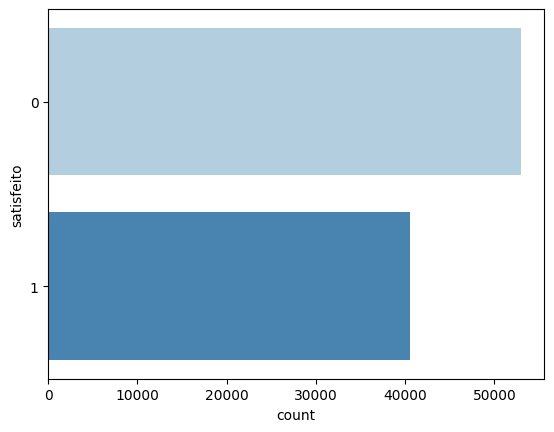

In [122]:
sns.countplot(y_train, palette='Blues')

<ipython-input-123-8e9af800e6c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train1, palette='Blues')


<Axes: xlabel='count', ylabel='satisfeito'>

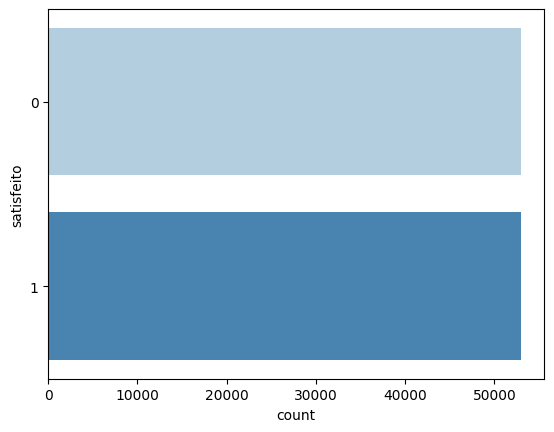

In [123]:
sns.countplot(y_train1, palette='Blues')

#Regressão Logística com REAMOSTRAGEM

In [124]:
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(X_test,y_test))
lrwpred = lrw.predict(X_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displrw = confusion_matrix( y_test, lrwpred)
displrw

train accuracy: 0.8702608761357841 
 test accuracy: 0.8742180733326917


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5895
           1       0.86      0.85      0.85      4496

    accuracy                           0.87     10391
   macro avg       0.87      0.87      0.87     10391
weighted avg       0.87      0.87      0.87     10391



confusion matrix for logistic regression


array([[5265,  677],
       [ 630, 3819]])

#Não demonstrou uma melhora significativa

In [125]:
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(X_test,y_test))

ldawpred = ldaw.predict(X_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(y_test, ldawpred))
print("\n")
print("confusion matrix for linear discriminant analysis")
displdaw = confusion_matrix(y_test, ldawpred)
displdaw

train accuracy: 0.867994030640195 
 test accuracy: 0.8699836396881917


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5942
           1       0.84      0.85      0.85      4449

    accuracy                           0.87     10391
   macro avg       0.87      0.87      0.87     10391
weighted avg       0.87      0.87      0.87     10391



confusion matrix for linear discriminant analysis


array([[5238,  704],
       [ 647, 3802]])

In [126]:
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(X_test,y_test))

dtwpred = dtw.predict(X_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test, dtwpred))
print("\n")
print("confusion matrix for decision tree classifier")
dispdtw =confusion_matrix(y_test, dtwpred)
dispdtw

train accuracy: 1.0 
 test accuracy: 0.9453373111346357


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5942
           1       0.93      0.94      0.94      4449

    accuracy                           0.95     10391
   macro avg       0.94      0.94      0.94     10391
weighted avg       0.95      0.95      0.95     10391



confusion matrix for decision tree classifier


array([[5632,  310],
       [ 258, 4191]])

Para determinar o melhor modelo para aplicar em um problema de classificação para previsão de clientes satisfeitos, podemos considerar várias métricas de desempenho, como acurácia, recall e F1-Score. Aqui está uma análise com base nas métricas fornecidas:

1. **Acurácia**:
   - A acurácia mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo. Um modelo com alta acurácia é capaz de fazer previsões precisas para as classes positivas e negativas.
   - Com base na acurácia nos dados de teste, os modelos "Extra Gradient Boost", "Extra tree", "Voting", "Stacking" e "Catboosting" têm as maiores acurácias, todos acima de 0.96.

2. **Recall**:
   - O recall (também conhecido como sensibilidade) mede a proporção de positivos verdadeiros (verdadeiros positivos) que foram corretamente identificados pelo modelo em relação ao total de positivos verdadeiros no conjunto de dados.
   - Com base no recall, os modelos "Extra Gradient Boost", "Extra tree", "Stacking" e "Catboosting" têm os valores mais altos, todos acima de 0.96.

3. **F1-Score**:
   - O F1-Score é a média harmônica entre precisão e recall. Ele fornece uma medida balanceada entre a precisão e o recall do modelo.
   - Os modelos "Extra Gradient Boost", "Decision Tree" e "Decision Tree Oversampling" têm os valores mais altos de F1-Score, todos acima de 0.94.

Com base nessas métricas, podemos concluir que os modelos "Extra Gradient Boost", "Extra tree", "Stacking" e "Catboosting" têm um desempenho geralmente superior em relação à acurácia, recall e F1-Score. Portanto, esses modelos podem ser considerados os melhores para aplicar em um problema de classificação para previsão de clientes satisfeitos.



Se desconsiderarmos os modelos com potencial de sobreajuste, devemos focar nos modelos que mostraram bom desempenho sem alcançar uma acurácia de treinamento perfeita. A partir da tabela fornecida, os modelos que não apresentam potencial de sobreajuste e ainda apresentam desempenho significativo são:

1. **Gradient Boost**:
   - Embora tenha uma acurácia de treinamento alta, ela não é perfeita, sugerindo que o modelo não está sobreajustado.
   - Tem boas métricas de desempenho, incluindo acurácia de teste, recall e F1-Score.

2. **Ada**:
   - Apresenta acurácia de treinamento e teste próximas, o que sugere que o modelo está generalizando bem.
   - Tem boas métricas de desempenho, incluindo recall e F1-Score.

3. **Catboosting**:
   - Tem acurácia de treinamento alta, mas não perfeita, sugerindo que o modelo está generalizando bem.
   - Apresenta boas métricas de desempenho, incluindo acurácia de teste, recall e F1-Score.

Com base nessas considerações, os modelos Gradient Boost, Ada e Catboosting são boas opções para aplicar em um problema de classificação para previsão de clientes satisfeitos, pois apresentam bom desempenho sem sinais claros de sobreajuste.

In [152]:
Modelos_Testados = pd.Series(['Ridge',
                              'Logistic Regression',
                     'Discriminante Linear',
                     'Decision Tree',
                     'Gradient Boost',
                     'Ada',
                     'Extra Gradient Boost',
                     'Extra tree',
                     'Voting',
                     'Stacking',
                     'Catboosting',
                     'Logistic Regession Oversampling',
                              'Linear Discriminant oversampling',
                              'Decision Tree Oversampling'
                     ])
Acuracia_Train = pd.Series([0.8719,
                            0.8752,
                            0.8719,
                            1,
                            0.9413,
                            0.9216,
                            0.9755,
                            1,
                            0.9713,
                            1,
                            0.9756,
                            0.8693,
                            0.8668,
                            1])
Acuracia_Test = pd.Series([0.8725,
                           0.8757,
                           0.8724,
                           0.9456,
                           0.9412,
                           0.9288,
                           0.9642,
                           0.9612,
                           0.9393,
                           0.9624,
                           0.9632,
                           0.8700,
                           0.8696,
                           0.9450
])

Recall = pd.Series([0.86,
                    0.87,
                    0.86,
                    0.93,
                    0.94,
                    0.92,
                    0.97,
                    0.97,
                    0.95,
                    0.97,
                    0.97,
                    0.84,
                    0.86,
                    0.94
])

F1_Score = pd.Series([0.85,
                           0.85,
                           0.85,
                           0.94,
                           0.93,
                           0.92,
                           0.96,
                           0.95,
                           0.93,
                           0.96,
                           0.96,
                           0.85,
                           0.85,
                           0.94

])

df_modelos = pd.DataFrame({"Modelos_Testados": Modelos_Testados,
              "Acuracia_Train": Acuracia_Train,
              "Acuracia_Test":Acuracia_Test,
                           "Recall": Recall,
                           "F1-Score": F1_Score})

df_modelos

,Modelos_Testados,Acuracia_Train,Acuracia_Test,Recall,F1-Score
0,Ridge,0.8719,0.8725,0.86,0.85
1,Logistic Regression,0.8752,0.8757,0.87,0.85
2,Discriminante Linear,0.8719,0.8724,0.86,0.85
3,Decision Tree,1.0000,0.9456,0.93,0.94
4,Gradient Boost,0.9413,0.9412,0.94,0.93
5,Ada,0.9216,0.9288,0.92,0.92
6,Extra Gradient Boost,0.9755,0.9642,0.97,0.96
7,Extra tree,1.0000,0.9612,0.97,0.95
8,Voting,0.9713,0.9393,0.95,0.93
9,Stacking,1.0000,0.9624,0.97,0.96


In [128]:
df_modelos.query('Acuracia_Train < Acuracia_Test')

,Modelos_Testados,Acuracia_Train,Acuracia_Test
0,Ridge,0.8719,0.8725
1,Logistic Regression,0.8752,0.8757
2,Discriminante Linear,0.8719,0.8724
5,Ada,0.9216,0.9288
11,Logistic Regession Oversampling,0.8693,0.8700
12,Linear Discriminant oversampling,0.8668,0.8696


#Estes foram os modelos que no teste foram, ligeiramente, melhor.

In [129]:
df_modelos.query('Acuracia_Train > Acuracia_Test')

,Modelos_Testados,Acuracia_Train,Acuracia_Test
3,Decision Tree,1.0000,0.9456
4,Gradient Boost,0.9413,0.9412
6,Extra Gradient Boost,0.9755,0.9642
7,Extra tree,1.0000,0.9612
8,Voting,0.9713,0.9393
9,Stacking,1.0000,0.9624
10,Catboosting,0.9756,0.9632
13,Decision Tree Oversampling,1.0000,0.9450


#Estes foram os modelos que performaram melhor em treinamento

Com base nos resultados de acurácia do conjunto de treinamento e teste dos modelos testados, podemos considerar os seguintes pontos:

1. **Decision Tree (Árvore de Decisão)**:
   - A acurácia no conjunto de treinamento é de 100%, o que sugere um possível sobreajuste aos dados de treinamento.
   - A acurácia no conjunto de teste é alta, mas ligeiramente inferior à acurácia no conjunto de treinamento. Isso pode indicar que o modelo está generalizando bem, mas ainda há uma pequena margem para melhorias.

2. **Gradient Boost**:
   - Tanto a acurácia no conjunto de treinamento quanto no conjunto de teste são próximas, indicando uma boa generalização do modelo.

3. **Extra Gradient Boost**:
   - A acurácia no conjunto de treinamento é alta, mas não perfeita, sugerindo que o modelo pode estar generalizando bem sem sobreajustar.
   - A acurácia no conjunto de teste é próxima à acurácia no conjunto de treinamento, o que é um bom sinal de generalização.

4. **Extra Tree**:
   - Assim como a Árvore de Decisão, este modelo apresenta acurácia perfeita no conjunto de treinamento, o que levanta preocupações sobre possível sobreajuste.
   - A acurácia no conjunto de teste é alta, mas ligeiramente inferior à acurácia no conjunto de treinamento.

5. **Voting**:
   - O modelo de votação (Voting) apresenta uma boa acurácia tanto no conjunto de treinamento quanto no conjunto de teste, mas é ligeiramente inferior aos melhores modelos.

6. **Stacking**:
   - Este modelo também apresenta acurácia perfeita no conjunto de treinamento, o que levanta preocupações sobre possível sobreajuste.
   - A acurácia no conjunto de teste é alta, mas ligeiramente inferior à acurácia no conjunto de treinamento.

7. **Catboosting**:
   - Ambas as acurácias de treinamento e teste são altas e muito próximas, indicando um bom desempenho e generalização do modelo.

Com base nesses resultados, modelos como Gradient Boost, Extra Gradient Boost e Catboosting parecem ser boas opções para aplicar em um problema de classificação para previsão de clientes satisfeitos, pois eles têm boas acurácias tanto no conjunto de treinamento quanto no conjunto de teste, indicando uma boa capacidade de generalização.

#Decidi usar o CatBoost

In [130]:
test.shape

(25976, 23)

In [131]:
test.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,-1.035348,1.144063,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.247517,0.297077,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.035348,-1.396893,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.247517,-2.243878,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.540315,-1.396893,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275


In [132]:
y_teste.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

In [133]:
results = cc.predict(test)

In [134]:
df_submission = test.copy()

In [135]:
df_submission.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_de_checkin,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,-1.035348,1.144063,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.247517,0.297077,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.035348,-1.396893,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.247517,-2.243878,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.540315,-1.396893,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275


In [136]:
df_submission['Satisfied_Predict']=results
df_submission.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,servico_a_bordo,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,Satisfied_Predict
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,1.144063,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275,1
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,0.297077,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275,1
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.396893,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275,0
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-2.243878,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275,1
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,-1.396893,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275,0


In [137]:
y_teste.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

In [138]:
df_submission['Satisfacao_Real'] = y_teste
df_submission.head()

,idade,distancia_voo,serviço_wifi_abordo,pontualidade_ok,facilidade_reserva_online,localizacao_portao,comida_bebida,embarque_online,conforto_assento,entretenimento_a_bordo,...,limpeza,partida_atrasada_minutos,chegada_atrasada_minutos,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,Satisfied_Predict,Satisfacao_Real
0,0.818159,-1.686511,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,1.298998,1.49947,1.436024,-0.985932,-0.476040,-0.663378,1.116370,-0.282275,1,satisfied
1,-0.239212,1.421499,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,1.298998,-0.83716,-0.841951,-0.985932,-0.476040,-0.663378,-0.895761,-0.282275,1,satisfied
2,-1.296584,-1.518479,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-0.974927,-0.83716,-0.841951,1.014269,2.100665,-0.663378,1.116370,-0.282275,0,neutral or dissatisfied
3,0.289474,1.631765,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,0.541023,-0.83716,0.786738,1.014269,-0.476040,-0.663378,-0.895761,-0.282275,1,satisfied
4,0.619902,0.359077,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.541023,-0.83716,1.195262,-0.985932,-0.476040,-0.663378,1.116370,-0.282275,0,satisfied


In [139]:
df_submission.columns

Index(['idade', 'distancia_voo', 'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'partida_atrasada_minutos', 'chegada_atrasada_minutos', 'Male',
       'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus',
       'Satisfied_Predict', 'Satisfacao_Real'],
      dtype='object')

In [140]:
df_submission = df_submission.drop(['idade', 'distancia_voo', 'serviço_wifi_abordo', 'pontualidade_ok',
       'facilidade_reserva_online', 'localizacao_portao', 'comida_bebida',
       'embarque_online', 'conforto_assento', 'entretenimento_a_bordo',
       'servicos_na_viagem', 'espaco_pernas', 'manuseio_das_malas',
       'servico_de_checkin', 'servico_a_bordo', 'limpeza',
       'partida_atrasada_minutos', 'chegada_atrasada_minutos', 'Male',
       'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus'], axis=1)



In [141]:
df_submission.head(10)

,Satisfied_Predict,Satisfacao_Real
0,1,satisfied
1,1,satisfied
2,0,neutral or dissatisfied
3,1,satisfied
4,0,satisfied
5,1,satisfied
6,1,satisfied
7,1,satisfied
8,1,satisfied
9,1,satisfied


In [143]:
df_submission.to_csv('submission.csv', index=False)

#Vou construir um grafico para o desempenho do Modelo
---
A variavel y_teste não é do mesmo tipo que a variável Results, por isso preciso transformá-la em um array de 0 e 1's.

In [144]:
y_teste

0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25976, dtype: object

Como as variáveis categóricas vou aplicar o get_dummies( )

In [145]:
satisfeito = pd.get_dummies(y_teste,drop_first=True)
satisfeito

,satisfied
0,1
1,1
2,0
3,1
4,1
...,...
25971,0
25972,1
25973,0
25974,1


Preciso checar qual tipo de dados é a variável 'results' para fazer o mesmo pela variavel original.

In [146]:
results

array([1, 1, 0, ..., 0, 1, 0])

Aqui, a variável satisfeito está como um DataFrame. Não é o tipo adequado. Como transformá-la em um array?

In [147]:
satisfeito

,satisfied
0,1
1,1
2,0
3,1
4,1
...,...
25971,0
25972,1
25973,0
25974,1


Com o código, podemos mudar o tipo de dados contido na variável que será comparada com a variável 'Results'.

In [148]:
satisfacao_real = satisfeito['satisfied'].values
satisfacao_real

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

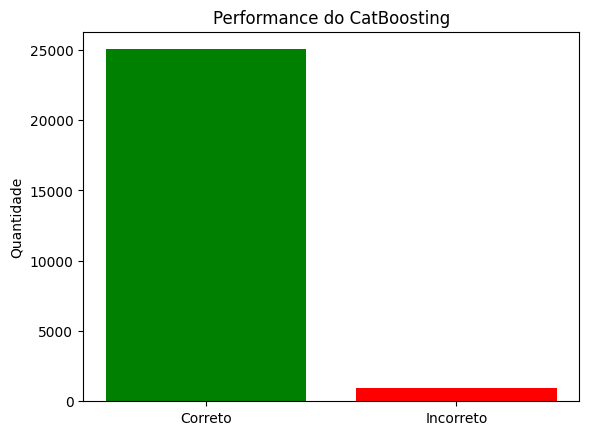

In [149]:
import matplotlib.pyplot as plt

# Dados reais e previsões do modelo CatBoosting
dados_reais = satisfacao_real # Exemplo de dados reais
previsoes_modelo = results  # Exemplo de previsões do modelo

# Contagem de acertos
acertos = sum(1 for i in range(len(dados_reais)) if dados_reais[i] == previsoes_modelo[i])

# Plotando o gráfico
fig, ax = plt.subplots()
labels = ['Correto', 'Incorreto']
valores = [acertos, len(dados_reais) - acertos]

ax.bar(labels, valores, color=['green', 'red'])
ax.set_ylabel('Quantidade')
ax.set_title('Performance do CatBoosting')

plt.show()


#COMPARAÇÃO
---
Criei uma função para comparar os melhores modelos avaliados, sendo o Extra Gradiente Boosting, Ada, Gradient Boost, Voting e Catboosting.

In [162]:
def comparacao_modelos(modelo):
    results = modelo.predict(test)
    # Dados reais e previsões do modelo CatBoosting
    dados_reais = satisfacao_real # Exemplo de dados reais
    previsoes_modelo = results  # Exemplo de previsões do modelo

# Contagem de acertos
    acertos = sum(1 for i in range(len(dados_reais)) if dados_reais[i] == previsoes_modelo[i])

# Plotando o gráfico
    fig, ax = plt.subplots()
    labels = ['Correto', 'Incorreto']
    valores = [acertos, len(dados_reais) - acertos]

    ax.bar(labels, valores, color=['green', 'red'])
    ax.set_ylabel('Quantidade')
    ax.set_title(f'Performance do {modelo}')

plt.show()

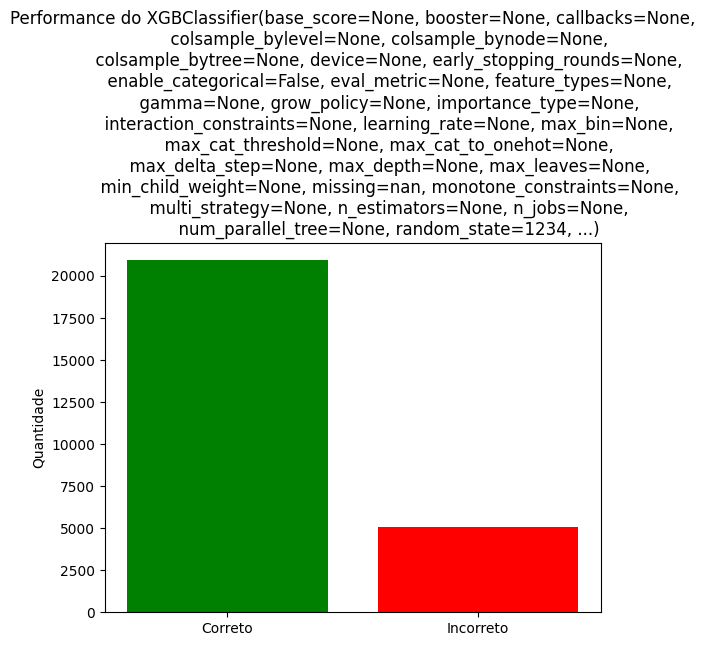

In [163]:
comparacao_modelos(xgb)

#Catboosting performou melhor

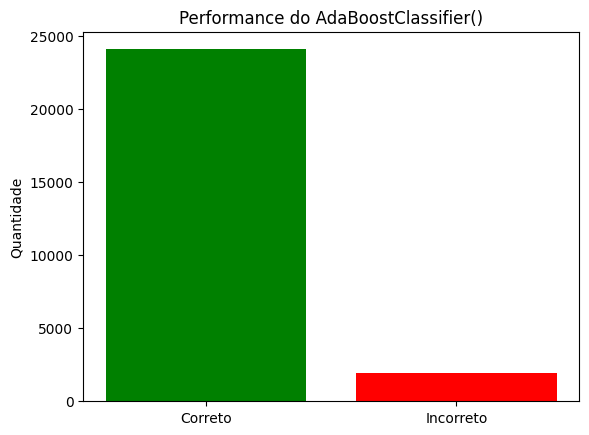

In [164]:
comparacao_modelos(ada)

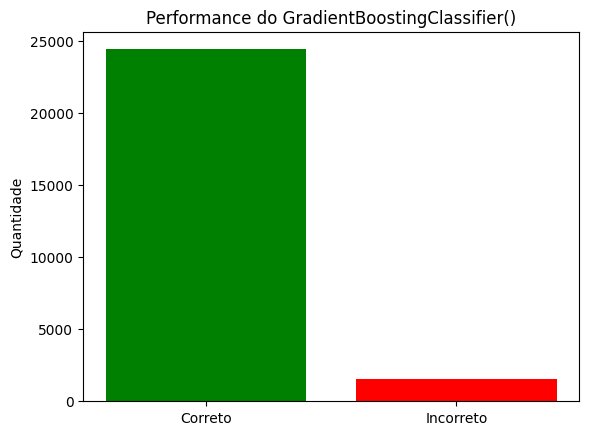

In [165]:
comparacao_modelos(gbm)

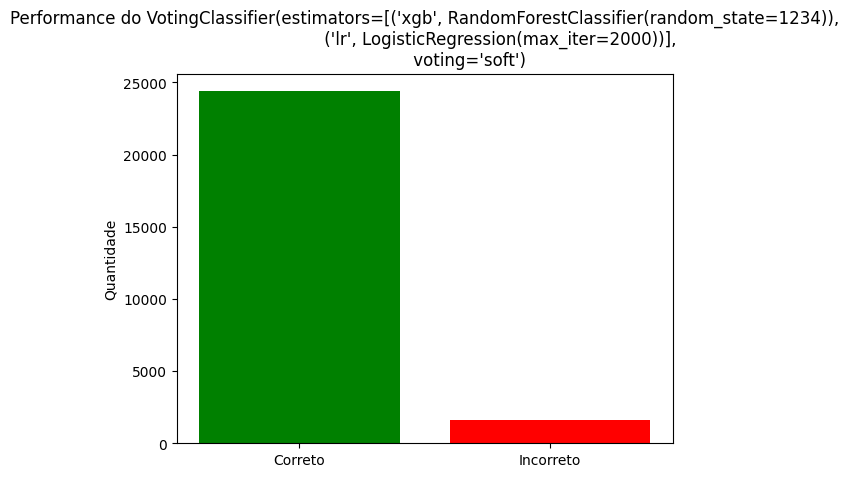

In [166]:
comparacao_modelos(vc)